In [1]:
import pandas as pd
import numpy as np
import math
import distance
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [521]:
colnames = ['indice','pre','word','post']
df = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Word_tags/1250-1299.csv', header = 4, names=colnames)
df = df[['pre','word','post']]
df['new'] = df['pre'] + (' ') + df['word']+ (' ') + df['post']
df['new'] = df['new'].str.lower()
df['drop'] = df['new'].str.find('seruus/sub  seruorum/sub  dei/sub ')
df = df[df['drop'] == -1]
df = df.reset_index()
df.pop('index')
df.pop('drop')
df.pop('new')
liste_1 = df['pre'].str.split(('  ')).tolist()
for i in range(len(liste_1)):
    liste_1[i] = liste_1[i][-5:]
    
liste_2 = df['post'].str.split(('  ')).tolist()
for i in range(len(liste_2)):
    liste_2[i] = liste_2[i][:5]
liste = []
for i in range(len(liste_1)):
    liste.append(liste_1[i] + liste_2[i])


In [527]:
for i in liste:
    for j in i:
        if j[-3:] != 'VBE':
            i.remove(j)
liste

[[' habitare/VBE', 'facit/VBE'],
 [' serworum/VBE'],
 ['habebant/VBE'],
 ['fecimus/VBE'],
 [],
 [],
 ['idegerusf/VBE', 'plures/QLF </s><s> Actum/VBE'],
 ['remensis/VBE'],
 ['Diemo/VBE', ' dicti/VBE'],
 ['existens/VBE', 'duxerit/VBE'],
 [' promouentium/VBE', 'effici/VBE', 'cupientes/VBE'],
 [' promouentium/VBE', 'effici/VBE', 'cupientes/VBE'],
 [],
 ['confessi/VBE', 'sunt/VBE', ' esse/VBE'],
 [],
 [],
 ['multiplicatum/VBE'],
 [],
 [],
 [],
 [],
 ['dicti/VBE', 'dicitur/VBE'],
 ['amen/INT </s><s> Beneualete/NAM </s><s> Suscipe/VBE'],
 ['primo/NUM </s><s> Suscipe/VBE'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['concessit/VBE', 'dictis/VBE'],
 [],
 [],
 [],
 [],
 ['constituti/VBE'],
 ['debent/VBE'],
 [],
 ['episcopous/VBE', 'seruu/VBE'],
 ['ducit/VBE', 'potest/VBE', 'facere/VBE'],
 ['Snitzer/VBE'],
 ['facio/VBE', 'promitto/VBE'],
 [],
 [],
 [],
 ['cupientes/VBE', 'honorare/VBE'],
 ['deuant/VBE', 'ait/VBE'],
 ['deuant/VBE', 'ait/VBE'],
 ['futuri/VBE', 'maneant/VBE'],
 ['habeant/VBE'],
 ['conmendantis

In [528]:
df['vbe'] = liste
df['word'] = df['word'].str.split('/').str[0]
df['word'] = df['word'].str.lower()
df['cas_seruus'] = ""

for i in range(len(df['vbe'])):
    for j in range(len(df['vbe'][i])):
        df['vbe'][i][j] = df['vbe'][i][j].split('/')[0].lower()

df['vbe_1'] = ""
df['vbe_2'] = ""
df['vbe_3'] = ""
df['vbe_4'] = ""
df['vbe_5'] = ""

for i in range(len(liste)):
    for cas in range(len(liste[i])):
        if cas == 0:
            df['vbe_1'][i] = liste[i][cas]
        if cas == 1:
            df['vbe_2'][i] = liste[i][cas]
        if cas == 2:
            df['vbe_3'][i] = liste[i][cas]
        if cas == 3:
            df['vbe_4'][i] = liste[i][cas]
        if cas == 4:
            df['vbe_5'][i] = liste[i][cas]
            
for i in range(len(df)):
    if df['word'][i] == ' seruus':
        df['cas_seruus'][i] = 'nom_sg'
    if df['word'][i] == ' seruorum':
        df['cas_seruus'][i] = 'gen_pl'
    if df['word'][i] == ' seruos':
        df['cas_seruus'][i] = 'acc_pl'
    if df['word'][i] == ' seruo':
        df['cas_seruus'][i] = 'dat_sg | abl_sg'
    if df['word'][i] == ' serui':
        df['cas_seruus'][i] = 'gen_sg | nom pl'
    if df['word'][i] == ' seruum':
        df['cas_seruus'][i] = 'acc_sg'
    if df['word'][i] == ' seruis':
        df['cas_seruus'][i] = 'dat_pl | abl_pl'
        
df['actif_1'] = ""
df['actif_2'] = ""
df['actif_3'] = ""
df['actif_4'] = ""
df['actif_5'] = ""

df["passif_1"] = ""
df["passif_2"] = ""
df["passif_3"] = ""
df["passif_4"] = ""
df["passif_5"] = ""

df["participe_1"] = ""
df["participe_2"] = ""
df["participe_3"] = ""
df["participe_4"] = ""
df["participe_5"] = ""

df["cas_participe_1"] = ""
df["cas_participe_2"] = ""
df["cas_participe_3"] = ""
df["cas_participe_4"] = ""
df["cas_participe_5"] = ""

for i in range(len(df)):
    if df['vbe_1'][i].endswith(('ens','entis','ntes','nti','ntium','nte','tus','ntis')):
        df['participe_1'][i] = df['vbe_1'][i]
    if df['vbe_2'][i].endswith(('ens','entis','ntes','nti','ntium','nte','tus','ntis')):
        df['participe_2'][i] = df['vbe_2'][i]
    if df['vbe_3'][i].endswith(('ens','entis','ntes','nti','ntium','nte','tus','ntis')):
        df['participe_3'][i] = df['vbe_3'][i]
    if df['vbe_4'][i].endswith(('ens','entis','ntes','nti','ntium','nte','tus','ntis')):
        df['participe_4'][i] = df['vbe_4'][i]
    if df['vbe_5'][i].endswith(('ens','entis','ntes','nti','ntium','nte','tus','ntis')):
        df['participe_5'][i] = df['vbe_5'][i]
        
for i in range(len(df)):
    if df['participe_1'][i].endswith('ens'):
        df['cas_participe_1'][i] = ['nom_sg']
    elif df['participe_1'][i].endswith('entis'):
        df['cas_participe_1'][i] = ['gen_sg']
    elif df['participe_1'][i].endswith('nti'):
        df['cas_participe_1'][i] = ['dat_sg'] 
    elif df['participe_1'][i].endswith('ntes'):
        df['cas_participe_1'][i] = ['nom_pl','acc_pl']
    elif df['participe_1'][i].endswith('ntium'):
        df['cas_participe_1'][i] = ['gen_pl']
    elif df['participe_1'][i].endswith('nte'):
        df['cas_participe_1'][i] = ['abl_sg']
    elif df['participe_1'][i].endswith('tus'):
        df['cas_participe_1'][i] = ['nom_sg']
    elif df['participe_1'][i].endswith('ntis'):
        df['cas_participe_1'][i] = ['abl_pl']  
        
for i in range(len(df)):
    if df['participe_2'][i].endswith('ens'):
        df['cas_participe_2'][i] = ['nom_sg']
    elif df['participe_2'][i].endswith('entis'):
        df['cas_participe_2'][i] = ['gen_sg']
    elif df['participe_2'][i].endswith('nti'):
        df['cas_participe_2'][i] = ['dat_sg'] 
    elif df['participe_2'][i].endswith('ntes'):
        df['cas_participe_2'][i] = ['nom_pl','acc_pl']
    elif df['participe_2'][i].endswith('ntium'):
        df['cas_participe_2'][i] = ['gen_pl']
    elif df['participe_2'][i].endswith('nte'):
        df['cas_participe_2'][i] = ['abl_sg']
    elif df['participe_2'][i].endswith('tus'):
        df['cas_participe_2'][i] = ['nom_sg']
    elif df['participe_2'][i].endswith('ntis'):
        df['cas_participe_2'][i] = ['abl_pl'] 
        
for i in range(len(df)):
    if df['participe_3'][i].endswith('ens'):
        df['cas_participe_3'][i] = ['nom_sg']
    elif df['participe_3'][i].endswith('entis'):
        df['cas_participe_3'][i] = ['gen_sg']
    elif df['participe_3'][i].endswith('nti'):
        df['cas_participe_3'][i] = ['dat_sg'] 
    elif df['participe_3'][i].endswith('ntes'):
        df['cas_participe_3'][i] = ['nom_pl','acc_pl']
    elif df['participe_3'][i].endswith('ntium'):
        df['cas_participe_3'][i] = ['gen_pl']
    elif df['participe_3'][i].endswith('nte'):
        df['cas_participe_3'][i] = ['abl_sg']
    elif df['participe_3'][i].endswith('tus'):
        df['cas_participe_3'][i] = ['nom_sg']
    elif df['participe_3'][i].endswith('ntis'):
        df['cas_participe_3'][i] = ['abl_pl'] 
        
for i in range(len(df)):
    if df['participe_4'][i].endswith('ens'):
        df['cas_participe_4'][i] = ['nom_sg']
    elif df['participe_4'][i].endswith('entis'):
        df['cas_participe_4'][i] = ['gen_sg']
    elif df['participe_4'][i].endswith('nti'):
        df['cas_participe_4'][i] = ['dat_sg'] 
    elif df['participe_4'][i].endswith('ntes'):
        df['cas_participe_4'][i] = ['nom_pl','acc_pl']
    elif df['participe_4'][i].endswith('ntium'):
        df['cas_participe_4'][i] = ['gen_pl']
    elif df['participe_4'][i].endswith('nte'):
        df['cas_participe_4'][i] = ['abl_sg']
    elif df['participe_4'][i].endswith('tus'):
        df['cas_participe_4'][i] = ['nom_sg']
    elif df['participe_4'][i].endswith('ntis'):
        df['cas_participe_4'][i] = ['abl_pl'] 
        
for i in range(len(df)):
    if df['participe_5'][i].endswith('ens'):
        df['cas_participe_5'][i] = ['nom_sg']
    elif df['participe_5'][i].endswith('entis'):
        df['cas_participe_5'][i] = ['gen_sg']
    elif df['participe_5'][i].endswith('nti'):
        df['cas_participe_5'][i] = ['dat_sg'] 
    elif df['participe_5'][i].endswith('ntes'):
        df['cas_participe_5'][i] = ['nom_pl','acc_pl']
    elif df['participe_5'][i].endswith('ntium'):
        df['cas_participe_5'][i] = ['gen_pl']
    elif df['participe_5'][i].endswith('nte'):
        df['cas_participe_5'][i] = ['abl_sg']
    elif df['participe_5'][i].endswith('tus'):
        df['cas_participe_5'][i] = ['nom_sg']
    elif df['participe_5'][i].endswith('ntis'):
        df['cas_participe_5'][i] = ['abl_pl'] 
        
        
        
        
for i in range(len(df)):
    if df['vbe_1'][i].endswith(('ar','er','ris','tur','mur','mini','ntur')):
        df['passif_1'][i] = df['vbe_1'][i]
    if df['vbe_2'][i].endswith(('ar','er','ris','tur','mur','mini','ntur')):
        df['passif_2'][i] = df['vbe_2'][i]
    if df['vbe_3'][i].endswith(('ar','er','ris','tur','mur','mini','ntur')):
        df['passif_3'][i] = df['vbe_3'][i]
    if df['vbe_4'][i].endswith(('ar','er','ris','tur','mur','mini','ntur')):
        df['passif_4'][i] = df['vbe_4'][i]
    if df['vbe_5'][i].endswith(('ar','er','ris','tur','mur','mini','ntur')):
        df['passif_5'][i] = df['vbe_5'][i]
        
for i in range(len(df)):
    if df['vbe_1'][i].endswith(('em','am','as','es','o','at','et','it','mus','tis','unt','ent','ant')):
        df['actif_1'][i] = df['vbe_1'][i]
    if df['vbe_2'][i].endswith(('em','am','as','es','o','at','et','it','mus','tis','unt','ent','ant')):
        df['actif_2'][i] = df['vbe_2'][i]
    if df['vbe_3'][i].endswith(('em','am','as','es','o','at','et','it','mus','tis','unt','ent','ant')):
        df['actif_3'][i] = df['vbe_2'][i]
    if df['vbe_4'][i].endswith(('em','am','as','es','o','at','et','it','mus','tis','unt','ent','ant')):
        df['actif_4'][i] = df['vbe_4'][i]
    if df['vbe_5'][i].endswith(('em','am','as','es','o','at','et','it','mus','tis','unt','ent','ant')):
        df['actif_5'][i] = df['vbe_5'][i]

liste_actif_sg_nom = []
liste_actif_pl_nom = []
liste_actif_sg_acc = []
liste_passif_sg = []
liste_passif_pl = []
liste_ppp = []

for i in range(len(df)):
    liste_ppp.append(df['participe_1'][i])
    liste_ppp.append(df['participe_2'][i])
    liste_ppp.append(df['participe_3'][i])
    liste_ppp.append(df['participe_4'][i])
    liste_ppp.append(df['participe_5'][i])

liste_ppp = list(filter(None,liste_ppp))

for i in range(len(df)):
    if df['actif_1'][i].endswith(('at','et','it')) and df['cas_seruus'][i] == 'nom_sg':
        liste_actif_sg_nom.append(df['actif_1'][i]) 
    if df['actif_1'][i].endswith(('ant','ent','int')) and df['cas_seruus'][i] == 'gen_sg | nom pl':
        liste_actif_pl_nom.append(df['actif_1'][i])
    if df['actif_1'][i].endswith(('at','et','it','em','am','as','es','o','mus','tis','ant','ent','int')) and df['cas_seruus'][i] == 'acc_sg':
        liste_actif_sg_acc.append(df['actif_1'][i]) 
    if df['actif_1'][i].endswith(('at','et','it','em','am','as','es','o','mus','tis','ant','ent','int')) and df['cas_seruus'][i] == 'acc_pl':
        liste_actif_sg_acc.append(df['actif_1'][i]) 
        
for i in range(len(df)):
    if df['actif_2'][i].endswith(('at','et','it')) and df['cas_seruus'][i] == 'nom_sg':
        liste_actif_sg_nom.append(df['actif_2'][i]) 
    if df['actif_2'][i].endswith(('ant','ent','int')) and df['cas_seruus'][i] == 'gen_sg | nom pl':
        liste_actif_pl_nom.append(df['actif_2'][i])
    if df['actif_2'][i].endswith(('at','et','it','em','am','as','es','o','mus','tis','ant','ent','int')) and df['cas_seruus'][i] == 'acc_sg':
        liste_actif_sg_acc.append(df['actif_2'][i]) 
    if df['actif_2'][i].endswith(('at','et','it','em','am','as','es','o','mus','tis','ant','ent','int')) and df['cas_seruus'][i] == 'acc_pl':
        liste_actif_sg_acc.append(df['actif_2'][i]) 
        
for i in range(len(df)):
    if df['actif_3'][i].endswith(('at','et','it')) and df['cas_seruus'][i] == 'nom_sg':
        liste_actif_sg_nom.append(df['actif_3'][i]) 
    if df['actif_3'][i].endswith(('ant','ent','int')) and df['cas_seruus'][i] == 'gen_sg | nom pl':
        liste_actif_pl_nom.append(df['actif_3'][i])
    if df['actif_3'][i].endswith(('at','et','it','em','am','as','es','o','mus','tis','ant','ent','int')) and df['cas_seruus'][i] == 'acc_sg':
        liste_actif_sg_acc.append(df['actif_3'][i]) 
    if df['actif_3'][i].endswith(('at','et','it','em','am','as','es','o','mus','tis','ant','ent','int')) and df['cas_seruus'][i] == 'acc_pl':
        liste_actif_sg_acc.append(df['actif_3'][i]) 
        
for i in range(len(df)):
    if df['actif_4'][i].endswith(('at','et','it')) and df['cas_seruus'][i] == 'nom_sg':
        liste_actif_sg_nom.append(df['actif_4'][i]) 
    if df['actif_4'][i].endswith(('ant','ent','int')) and df['cas_seruus'][i] == 'gen_sg | nom pl':
        liste_actif_pl_nom.append(df['actif_4'][i])
    if df['actif_4'][i].endswith(('at','et','it','em','am','as','es','o','mus','tis','ant','ent','int')) and df['cas_seruus'][i] == 'acc_sg':
        liste_actif_sg_acc.append(df['actif_4'][i]) 
    if df['actif_4'][i].endswith(('at','et','it','em','am','as','es','o','mus','tis','ant','ent','int')) and df['cas_seruus'][i] == 'acc_pl':
        liste_actif_sg_acc.append(df['actif_4'][i]) 
        
for i in range(len(df)):
    if df['actif_5'][i].endswith(('at','et','it')) and df['cas_seruus'][i] == 'nom_sg':
        liste_actif_sg_nom.append(df['actif_5'][i]) 
    if df['actif_5'][i].endswith(('ant','ent','int')) and df['cas_seruus'][i] == 'gen_sg | nom pl':
        liste_actif_pl_nom.append(df['actif_5'][i])
    if df['actif_5'][i].endswith(('at','et','it','em','am','as','es','o','mus','tis','ant','ent','int')) and df['cas_seruus'][i] == 'acc_sg':
        liste_actif_sg_acc.append(df['actif_5'][i]) 
    if df['actif_5'][i].endswith(('at','et','it','em','am','as','es','o','mus','tis','ant','ent','int')) and df['cas_seruus'][i] == 'acc_pl':
        liste_actif_sg_acc.append(df['actif_5'][i]) 

for i in range(len(df)):
    if df['passif_1'][i].endswith(('atur','itur','etur')) and df['cas_seruus'][i] == 'nom_sg':
        liste_passif_sg.append(df['passif_1'][i]) 
    if df['passif_1'][i].endswith('ntur') and df['cas_seruus'][i] == 'gen_sg | nom pl':
        liste_passif_pl.append(df['passif_1'][i])
        
    if df['passif_2'][i].endswith(('atur','itur','etur')) and df['cas_seruus'][i] == 'nom_sg':
        liste_passif_sg.append(df['passif_2'][i]) 
    if df['passif_2'][i].endswith('ntur') and df['cas_seruus'][i] == 'gen_sg | nom pl':
        liste_passif_pl.append(df['passif_2'][i])
        
    if df['passif_3'][i].endswith(('atur','itur','etur')) and df['cas_seruus'][i] == 'nom_sg':
        liste_passif_sg.append(df['passif_3'][i]) 
    if df['passif_3'][i].endswith('ntur') and df['cas_seruus'][i] == 'gen_sg | nom pl':
        liste_passif_pl.append(df['passif_3'][i])
        
    if df['passif_4'][i].endswith(('atur','itur','etur')) and df['cas_seruus'][i] == 'nom_sg':
        liste_passif_sg.append(df['passif_4'][i]) 
    if df['passif_4'][i].endswith('ntur') and df['cas_seruus'][i] == 'gen_sg | nom pl':
        liste_passif_pl.append(df['passif_4'][i])
        
    if df['passif_5'][i].endswith(('atur','itur','etur')) and df['cas_seruus'][i] == 'nom_sg':
        liste_passif_sg.append(df['passif_5'][i]) 
    if df['passif_5'][i].endswith('ntur') and df['cas_seruus'][i] == 'gen_sg | nom pl':
        liste_passif_pl.append(df['passif_5'][i])

        
        



In [404]:
Counter(liste_actif_sg_nom).most_common()

[('sit', 5),
 ('componat', 3),
 ('uoluerit', 3),
 ('erit', 2),
 ('occiderit', 2),
 ('soluat', 2),
 ('rogabat', 1),
 ('intraret', 1),
 ('fuerit', 1),
 ('debeat', 1),
 ('fuit', 1),
 ('reddat', 1),
 ('iurabit', 1),
 ('fecerit', 1),
 ('firmauit', 1),
 ('emendabit', 1),
 ('notuit', 1),
 ('teneret', 1),
 (' accipiet', 1),
 ('saluauit', 1),
 ('debet', 1),
 (' fecerit', 1),
 ('nesciuit', 1),
 ('erat', 1),
 ('postulabat', 1),
 ('tenet', 1),
 ('uincat', 1),
 ('fuisset', 1)]

In [498]:
len(liste_actif_sg_nom)

37

In [406]:
Counter(liste_actif_pl_nom).most_common()

[(' erant', 2),
 ('habitabant', 2),
 ('sint', 2),
 ('dent', 1),
 (' habent', 1),
 (' essent', 1),
 ('essent', 1),
 ('obtineant', 1),
 ('inhibent', 1),
 ('fiant', 1),
 ('transierint', 1)]

In [499]:
len(liste_actif_pl_nom)

17

In [536]:
Counter(liste_actif_sg_acc).most_common()

[('dicit', 2),
 ('aportato', 2),
 ('habebant', 1),
 ('primo', 1),
 ('concessit', 1),
 ('ducit', 1),
 ('habeant', 1),
 ('exspectant', 1),
 ('frequentent', 1),
 ('famulantes', 1),
 ('grauauerimus', 1),
 ('competebat', 1),
 ('habent', 1),
 ('declaramus', 1),
 ('inducas', 1),
 ('conantes', 1),
 ('excerceat', 1),
 ('intrantes', 1),
 ('operantes', 1),
 ('facit', 1),
 ('dictis', 1),
 ('maneant', 1),
 ('promouent', 1),
 ('elegit', 1),
 ('oporteat', 1),
 (' tenentes', 1),
 ('ponet', 1),
 ('uidit', 1),
 ('uidisset', 1),
 ('fuerint', 1),
 ('proficiat', 1),
 ('torpentem', 1)]

In [487]:
len(liste_actif_sg_acc)

238

In [310]:
Counter(liste_passif_sg).most_common()

[('continetur', 1), ('capitur', 1)]

In [287]:
len(list(set(liste_passif_pl)))

9

In [288]:
Counter(liste_ppp).most_common()

[('degentium', 8),
 ('laudante', 6),
 ('ostendens', 4),
 ('commorantes', 4),
 ('cupientes', 4),
 ('seuiente', 3),
 ('retinentes', 3),
 ('habitantes', 3),
 ('conquerens', 3),
 ('natus', 3),
 ('cupiens', 3),
 ('famulantium', 2),
 ('preripiente', 2),
 ('exeuntes', 2),
 ('deputatus', 2),
 ('dictus', 2),
 ('ostendentes', 2),
 ('dictante', 2),
 ('inhabitantes', 1),
 ('existentes', 1),
 ('ponens', 1),
 ('factus', 1),
 (' nolentes', 1),
 ('respicientes', 1),
 ('inuenti', 1),
 ('audiente', 1),
 ('seminantes', 1),
 ('auferens', 1),
 ('cognoscentes', 1),
 ('condemnantes', 1),
 ('regnante', 1),
 ('fodiens', 1),
 ('mandante', 1),
 ('morientium', 1),
 ('morientes', 1),
 (' accipiens', 1),
 ('habens', 1),
 ('nouigenti', 1),
 (' natus', 1),
 ('recognoscentes', 1),
 (' recognoscens', 1),
 ('torpentes', 1),
 ('negligentes', 1),
 ('exigente', 1),
 ('annuente', 1),
 ('uocatus', 1),
 ('pacificantes', 1),
 ('petentes', 1),
 ('satagentes', 1),
 ('statuentes', 1),
 ('commorantium', 1),
 ('uolens', 1),
 ('audi

In [529]:
len(liste_ppp)

35

In [563]:
colnames = ['indice','pre','word','post']
nono = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Word_tags/1250-1299.csv', header = 4, names=colnames)

In [564]:
nono = nono[['pre','word','post']]
nono['new'] = nono['pre'] + (' ') + nono['word']+ (' ') + nono['post']
nono['new'] = nono['new'].str.lower()
nono['drop'] = nono['new'].str.find('seruus/sub  seruorum/sub  dei/sub ')
nono = nono[nono['drop'] == -1]
nono = nono.reset_index()
nono.pop('index')
nono.pop('drop')
nono.pop('new')

0      <s> clareat/vbe  itaque/con  paternitati/sub  ...
1      publicum/qlf  instrumentum/sub </s><s> quod/pr...
2      dictus/vbe  wandelbere/nam  ipsius/pro  monast...
3      in/pre  cuius/pro  rei/sub  testimonium/sub  p...
4      <s> datum/vbe  lugduni/nam </s><s> kalendas/su...
                             ...                        
224    fama/sub  quod/pro  bona/sub  predicta/qlf  pe...
225    hee/nam  siquidem/con  a/pre  cristo/nam  ampl...
226    infra/pre  quatuordecim/num  dies/sub  post/pr...
227    dyocesis/sub  constantiensis/nam  subscriptoru...
228    denique/adv  hiis/pro  dubietatibus/sub  proui...
Name: new, Length: 229, dtype: object

In [565]:
nono = nono [['word']]
nono['word'] = nono['word'].str.split('/').str[0]
nono['word'] = nono['word'].str.lower()
nono.value_counts()

word     
 seruus      78
 serui       46
 seruos      34
 seruorum    21
 seruo       18
 seruum      16
 serue       11
seruus        2
seruo         1
seruos        1
seruum        1
dtype: int64

In [569]:
one = ["800",42,89,146]
two = ["850",53,157,166]
three = ["900",25,113,68]
four = ["950",22,189,103]
five = ["1000",72,157,134] 
six = ["1050",143,238,106]
seven = ["1100",54,237,105]
eight = ["1150",53,103,51]
nine = ["1200",57,86,43]
ten = ["1250",12,34,35]

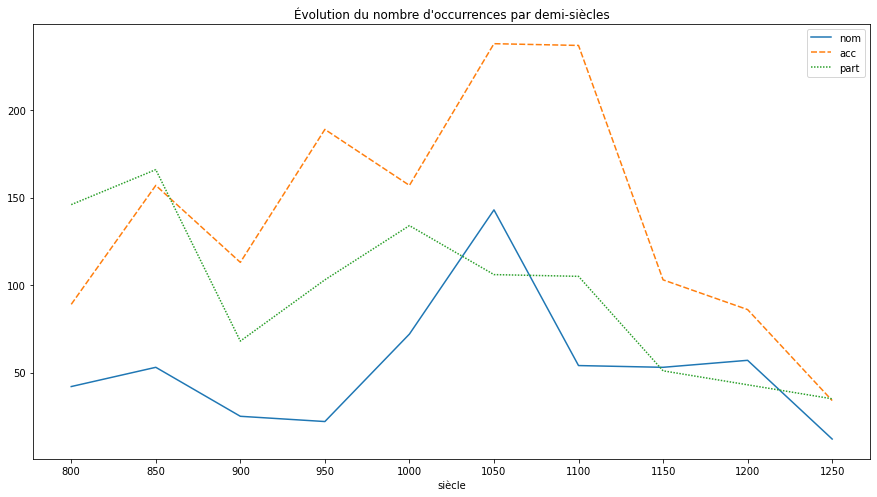

In [574]:
cas = [one, two, three, four, five, six, seven, eight, nine, ten]
colnames = ["siècle","nom","acc","part"]

evol = pd.DataFrame(cas, columns=colnames)
evol.index = evol.siècle
plt.figure(figsize=(15,8))
sns.lineplot(data=evol)
plt.title('Évolution du nombre d\'occurrences par demi-siècles')
plt.savefig("Occ_demi_siècles.png",dpi=300)

In [578]:
un = ["800",176,223]
deux = ["850",126,344]
trois = ["900",80,193]
quatre = ["950",123,388]
cinq = ["1000",309,479]
six = ["1050",394,393]
sept = ["1100",390,343]
huit = ["1150",216,169]
neuf = ["1200",193,104]
dix = ["1250",126,51]

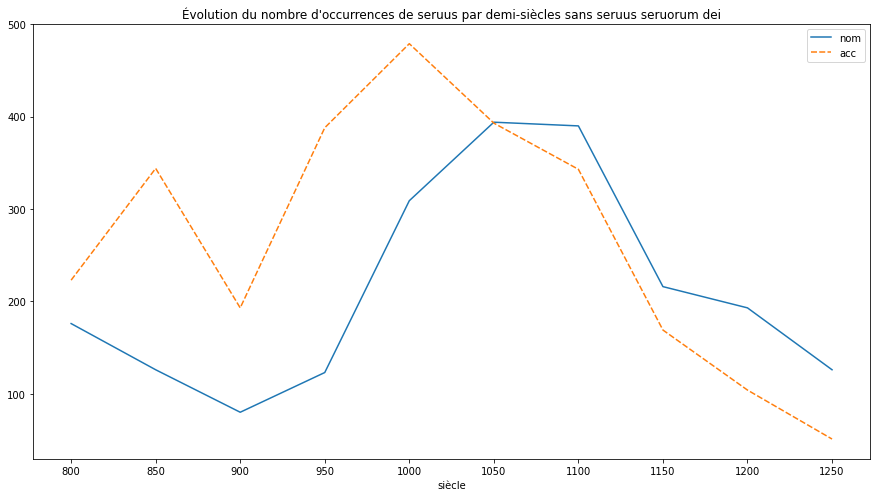

In [580]:
ohboy = [un, deux, trois, quatre, cinq, six, sept, huit, neuf, dix]
casnoe = ["siècle","nom",'acc']
data = pd.DataFrame(ohboy, columns=casnoe)
data.index = evol.siècle
plt.figure(figsize=(15,8))
sns.lineplot(data=data)
plt.title('Évolution du nombre d\'occurrences de seruus par demi-siècles sans seruus seruorum dei')
plt.savefig("Occ_demi_siècles_seruus_cas.png",dpi=300)